In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import os
import tensorflow as tf


In [41]:
data = os.path.join(os.getcwd(),'data_final.csv')

In [42]:
df = pd.read_csv(data)
df = df.loc[df['Price movement'].isin(["Up", "Down"])]
df["Headline"].apply(lambda x: x.lower())
df["Headline"].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Headline'].values)
X = tokenizer.texts_to_sequences(df['Headline'].values)
X = pad_sequences(X)

In [43]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 28, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 196)               254800    
                                                                 
 dense_6 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
Y = pd.get_dummies(df['Price movement']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2751, 28) (2751, 2)
(1356, 28) (1356, 2)


In [45]:
batch_size = 32
epochs = 20
history = model.fit(X_train, Y_train, epochs = epochs, batch_size=batch_size, verbose = 2)

Epoch 1/20
86/86 - 15s - loss: 0.6896 - accuracy: 0.5460 - precision_4: 0.5460 - recall_4: 0.5460 - 15s/epoch - 179ms/step
Epoch 2/20
86/86 - 4s - loss: 0.6601 - accuracy: 0.6129 - precision_4: 0.6129 - recall_4: 0.6129 - 4s/epoch - 45ms/step
Epoch 3/20
86/86 - 4s - loss: 0.5642 - accuracy: 0.7114 - precision_4: 0.7114 - recall_4: 0.7114 - 4s/epoch - 48ms/step
Epoch 4/20
86/86 - 4s - loss: 0.4821 - accuracy: 0.7739 - precision_4: 0.7739 - recall_4: 0.7739 - 4s/epoch - 44ms/step
Epoch 5/20
86/86 - 4s - loss: 0.4106 - accuracy: 0.8106 - precision_4: 0.8106 - recall_4: 0.8106 - 4s/epoch - 44ms/step
Epoch 6/20
86/86 - 4s - loss: 0.3563 - accuracy: 0.8364 - precision_4: 0.8364 - recall_4: 0.8364 - 4s/epoch - 47ms/step
Epoch 7/20
86/86 - 4s - loss: 0.3139 - accuracy: 0.8659 - precision_4: 0.8659 - recall_4: 0.8659 - 4s/epoch - 45ms/step
Epoch 8/20
86/86 - 5s - loss: 0.2760 - accuracy: 0.8808 - precision_4: 0.8808 - recall_4: 0.8808 - 5s/epoch - 53ms/step
Epoch 9/20
86/86 - 6s - loss: 0.2566 

In [46]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

43/43 - 1s - loss: 2.4308 - accuracy: 0.5900 - precision_4: 0.5900 - recall_4: 0.5900 - 623ms/epoch - 14ms/step
Accuracy: 59.00%


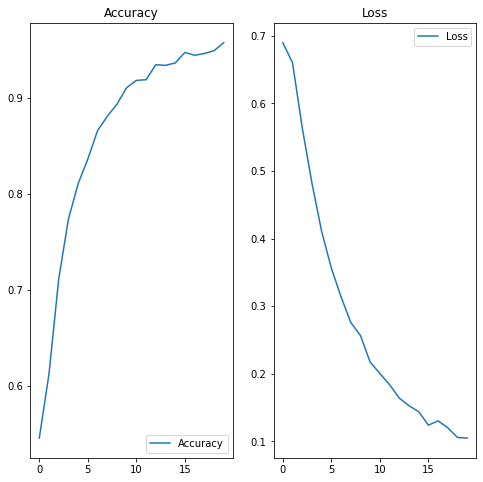

In [47]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()